# Exercises 1: Reading and Exploring Raster Data

Open the single-band DEM image using rasterio.

Retrieve and print the raster metadata, including the CRS, resolution, bounds, number of bands, and data types.

Display the raster’s width, height, and pixel data types to understand the grid dimensions and data structure.

In [2]:
import rasterio
import rasterio.plot
import geopandas as gpd
import numpy    as np
import matplotlib.pyplot as plt


In [3]:
singleband_file = 'https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif'
sr=rasterio.open(singleband_file)


In [4]:
sr.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': None,
 'width': 4269,
 'height': 3113,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]'),
 'transform': Affine(90.0, 0.0, -13442488.3428,
        0.0, -89.99579177642138, 4668371.5775)}

In [18]:
sr.bounds

BoundingBox(left=-13442488.3428, bottom=4388214.6777, right=-13058278.3428, top=4668371.5775)

# Exercise 2: Visualizing and Manipulating Raster Bands

Visualize the single-band DEM using a custom colormap (e.g., cmap=’terrain’).

Open the multispectral image and visualize the first band using a suitable colormap.

Combine multiple bands from the multispectral image (e.g., Red, Green, and Blue) and stack them to create an RGB composite image.

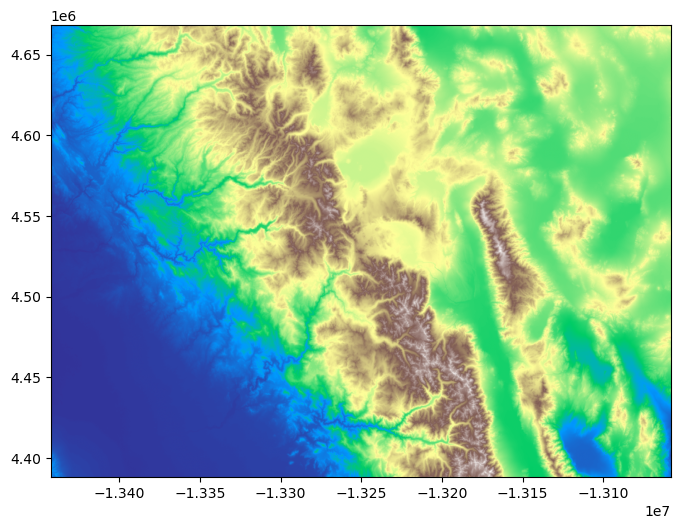

In [ ]:
# Visualize the single-band DEM using a custom colormap (e.g., cmap=’terrain’).
fig,ax = plt.subplots(figsize=(8,8))
rasterio.plot.show(sr,cmap='terrain')
plt.show()

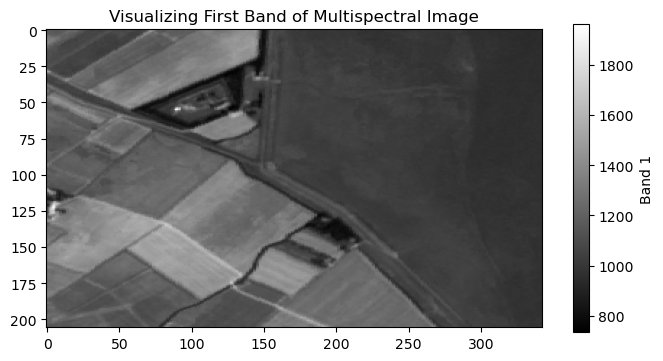

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 343, 'height': 206, 'count': 4, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(8.983152841195215e-05, 0.0, 6.860074498707138,
       0.0, -8.983152841195215e-05, 53.41634207654228)}


In [5]:
# Open the multispectral image and visualize the first band using a suitable colormap.
multiband_file = "https://github.com/opengeos/datasets/releases/download/raster/cog.tif"
multi=rasterio.open(multiband_file)
fig,ax = plt.subplots(figsize = (8,8))
first_band = multi.read(2)
plt.imshow(first_band,cmap='grey')
plt.colorbar (label='Band 1', shrink = 0.5)
plt.title('Visualizing First Band of Multispectral Image')
plt.show()
print(multi.meta)

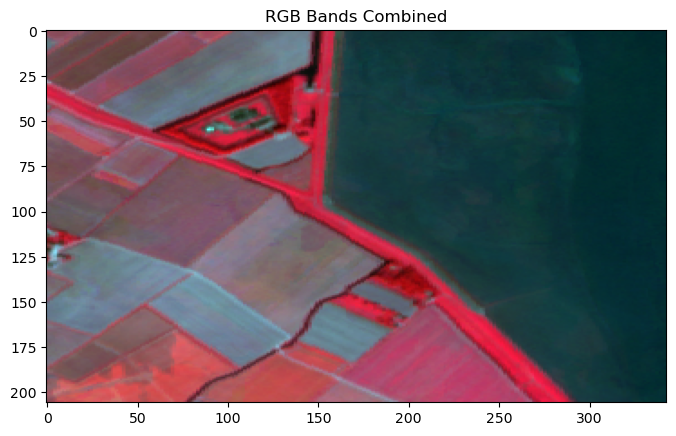

In [21]:
# Combine multiple bands from the multispectral image (e.g., Red, Green, and Blue) and 
# stack them to create an RGB composite image.
def normalize(band):
   return (band-band.min()) / (band.max()-band.min())

red_band = multi.read(4)
green_band = multi.read(3)
blue_band = multi.read(2)

normal_red = normalize(red_band)
normal_green = normalize(green_band)
normal_blue = normalize (blue_band)

rgb = np.dstack((normal_red,normal_green,normal_blue))

plt.figure(figsize=(8,8))
plt.imshow(rgb)
plt.title("RGB Bands Combined")
plt.show()

# Exercise 3: Raster Clipping with Array Indexing

Open the multispectral image and clip a geographic subset using array indexing (specifying row and column ranges).

Visualize the clipped portion of the image using matplotlib to ensure the subset is correct.

Save the clipped raster subset to a new file named clipped_multispectral.tif.

In [22]:
# using the multi from the above example
data=multi.read()
data.shape

(4, 206, 343)

In [38]:
#Selecting a subset only
subset = data[:,25:125,50:200]
print(subset.shape)


(4, 100, 150)


In [39]:
#Normalizing the values
n_red = normalize(subset[3])
n_green= normalize(subset[2])
n_blue = normalize(subset[1])

print(f"Original Shape of array {subset.shape}")

rgb_subsetnp = np.dstack((n_red,n_green,n_blue))

print(f"Shape changed due to stack {rgb_subsetnp.shape}")

rgb_subset=rgb_subsetnp.reshape((rgb_subsetnp.shape[2], rgb_subsetnp.shape[0], rgb_subsetnp.shape[1]))

print(f"Shape Restored : {rgb_subset.shape}")

Original Shape of array (4, 100, 150)
Shape changed due to stack (100, 150, 3)
Shape Restored : (3, 100, 150)


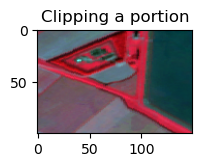

In [42]:
# Plot the stacked array
plt.figure(figsize=(2,2))
plt.imshow(rgb_subsetnp)
plt.title("Clipping a portion")
plt.show()

In [52]:
# Updating the profile (meta ) before writing to file

with rasterio.open(multiband_file) as src:
    profile = src.profile
print(profile)
profile.update(dtype=rasterio.uint8,width=rgb_subset.shape[2],height=rgb_subset.shape[1],count=3, compress='lzw')
print("Updated Profile\n")
print(profile)
print(rgb_subset.shape)


{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 343, 'height': 206, 'count': 4, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(8.983152841195215e-05, 0.0, 6.860074498707138,
       0.0, -8.983152841195215e-05, 53.41634207654228), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate', 'interleave': 'pixel'}
Updated Profile

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 150, 'height': 100, 'count': 3, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG"

In [49]:
output_raster_path = 'clipped_multispectral.tif'

with rasterio.open(output_raster_path,'w',**profile) as dst:
    dst.write(rgb_subset)
print("clipped_multispectral.tif File Created")

clipped_multispectral.tif File Created


# Exercise 4: Calculating NDWI (Band Math)

Open the multispectral image and extract the Green and Near-Infrared (NIR) bands.

Compute the Normalized Difference Water Index (NDWI) using the formula:

NDWI= (Green - NIR) / (Green + NIR)

Visualize the NDWI result using a water-friendly colormap (e.g., cmap=’Blues’) to highlight water bodies.

Save the resulting NDWI image as a new raster file named ndwi.tif.

In [17]:
def normalize(band):
   return (band-band.min()) / (band.max()-band.min())

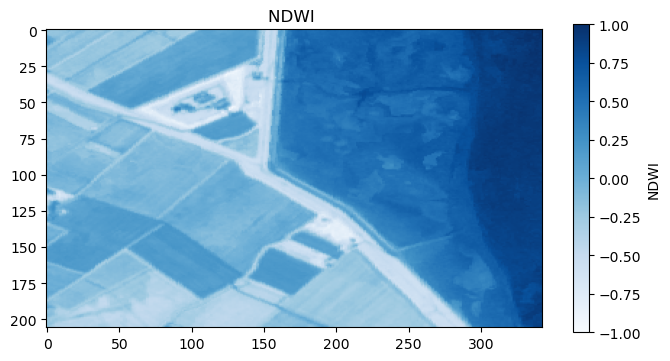

In [18]:
nearinfra=normalize(multi.read(4))
green = normalize(multi.read(2))
ndwi  = (green-nearinfra) / (green+nearinfra)

plt.figure(figsize=(8,8))
plt.imshow(ndwi,cmap='Blues')
plt.title("NDWI ")
plt.colorbar(label ="NDWI", shrink = 0.5)
plt.show()

In [25]:
#checking the ndwi values
print(f"Min Value of NDWI : {ndwi.min()}")
print(f"Max Value of NDWI : {ndwi.max()}")

# Scale NDWI values to the range 0-255 for uint8
ndwi_scaled = ((ndwi - np.min(ndwi)) / (np.max(ndwi) - np.min(ndwi)) * 255).astype(np.uint8)


Min Value of NDWI : -1.0
Max Value of NDWI : 1.0


In [26]:
# Save the resulting NDWI image as a new raster file named ndwi.tif.
# But first we have to update the profile of the original raster file
with rasterio.open(multiband_file) as src:
    profile = src.profile.copy()
print(profile)
profile.update(dtype=rasterio.uint8, count=1, compress='lzw')
print("Updated Profile\n")
print(profile)
print(ndwi.shape)

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 343, 'height': 206, 'count': 4, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(8.983152841195215e-05, 0.0, 6.860074498707138,
       0.0, -8.983152841195215e-05, 53.41634207654228), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate', 'interleave': 'pixel'}
Updated Profile

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 343, 'height': 206, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG"

In [28]:
#Now we can write the ndwi to a new file
output_raster_path = 'ndwi.tif'
with rasterio.open(output_raster_path,'w',**profile) as dst:
    dst.write(ndwi_scaled,1)   
print("ndwi.tif File Created")

ndwi.tif File Created


# Exercise 5: Reprojecting Raster Data

Reproject the single-band DEM raster from its original CRS to EPSG:4326 (WGS 84) using the rasterio.warp.reproject function.

Save the reprojected raster to a new GeoTIFF file named reprojected_dem.tif.

Visualize both the original and reprojected DEM datasets to compare how the reprojection affects the spatial coverage and resolution.

Original CRS EPSG:3857


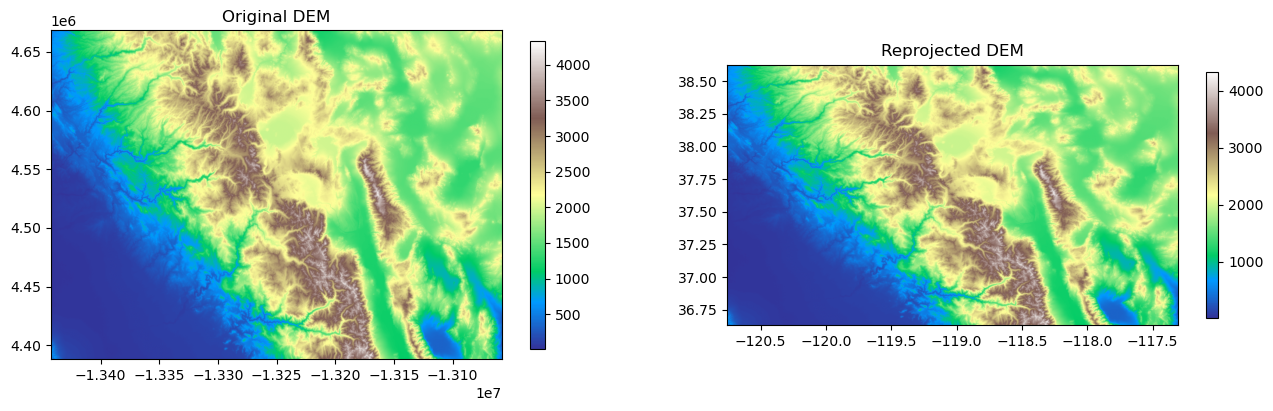

In [5]:
# reusing the first exercise data 

import rasterio.warp

print(f"Original CRS {sr.crs}")

# Reprojecting to crs EPSG:4326
dst_crs = 'EPSG:4326'
transform, width, height = rasterio.warp.calculate_default_transform(
	sr.crs, dst_crs, sr.width, sr.height, *sr.bounds)
kwargs = sr.meta.copy()
kwargs.update({
	'crs': dst_crs,
	'transform': transform,
	'width': width,
	'height': height
})

with rasterio.open('reprojected_dem.tif', 'w', **kwargs) as dst:
    for i in range(1, sr.count + 1):
        rasterio.warp.reproject(
            source=rasterio.band(sr, i),
            destination=rasterio.band(dst, i),
            src_transform=sr.transform,
            src_crs=sr.crs,
            dst_transform=transform,
            dst_crs=dst_crs,
            resampling=rasterio.warp.Resampling.nearest)

# Verify the reprojected image
with rasterio.open('reprojected_dem.tif') as reprojected:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    
    # Plot original DEM
    img1 = rasterio.plot.show(sr, ax=ax1, cmap='terrain')
    ax1.set_title('Original DEM')
    fig.colorbar(img1.get_images()[0], ax=ax1, shrink = 0.5)
    
    # Plot reprojected DEM
    img2 = rasterio.plot.show(reprojected, ax=ax2, cmap='terrain')
    ax2.set_title('Reprojected DEM')
    fig.colorbar(img2.get_images()[0], ax=ax2, shrink = 0.4)
    
    plt.show()
    